In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

color = "#00274C"
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig1_system design/d_condensate analysis"
os.chdir(folder_save)

um_per_pxl = 0.117
area_FOV = 418 * 674 * um_per_pxl**2

In [2]:
# concat all csv files
lst_df = []
lst_N_per_FOV = []
lst_area_fraction = []
for f in os.listdir(folder_save):
    if f.startswith("condensates_AIO"):
        df = pd.read_csv(f)
        lst_df.append(df)
        lst_N_per_FOV.append(df.shape[0])
        lst_area_fraction.append(df["area_um2"].sum() / area_FOV)
df_all = pd.concat(lst_df)
df_perFOV_stats = pd.DataFrame(
    {
        "N_per_FOV": lst_N_per_FOV,
        "area_fraction": lst_area_fraction,
    },
    dtype=float,
)

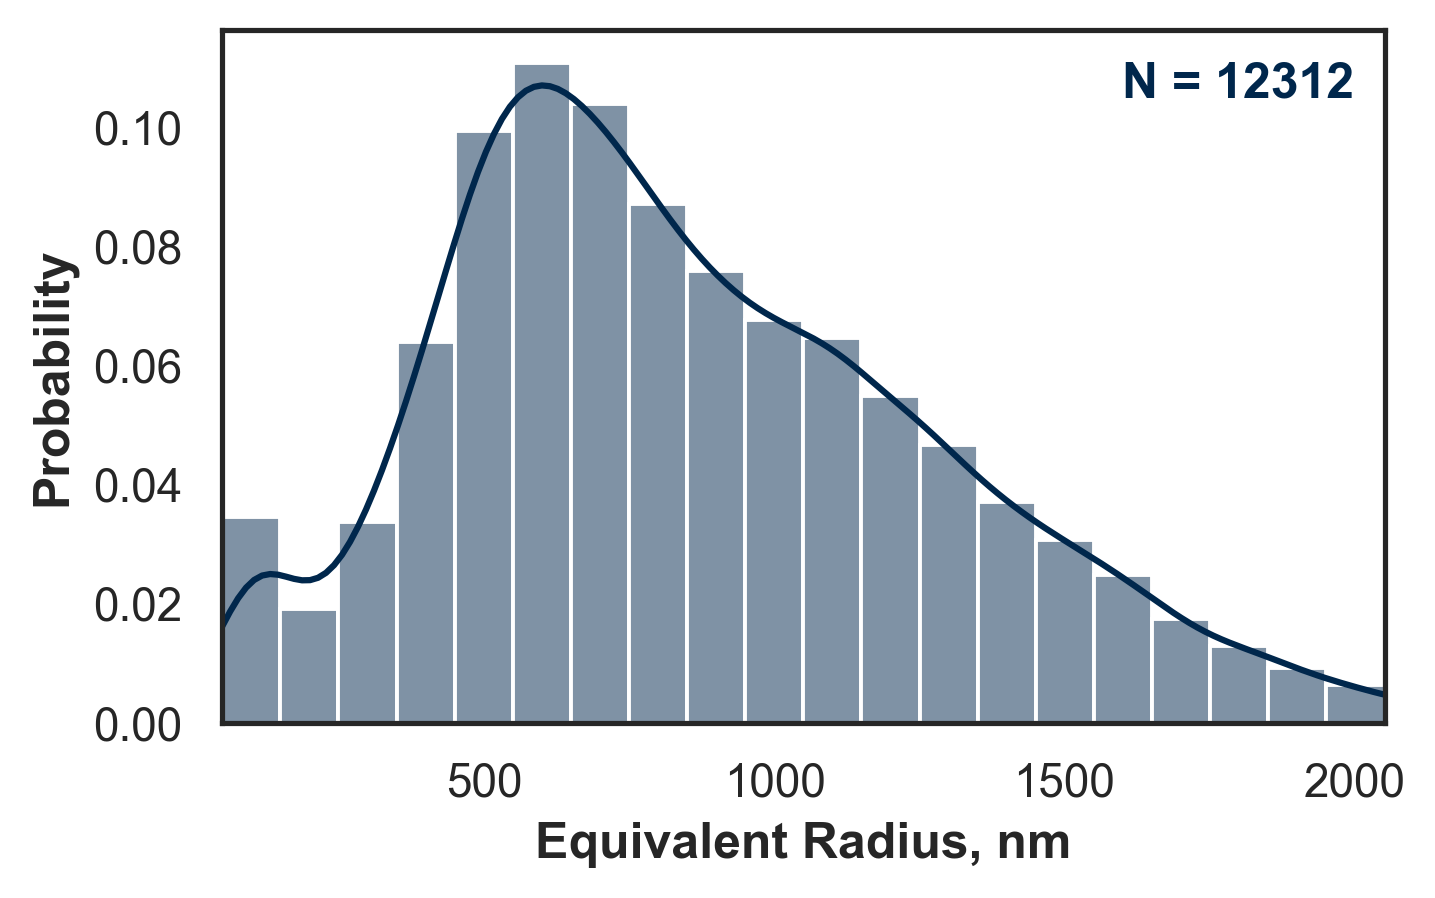

In [3]:
## plot R
column_name = "R_nm"
x_label = "Equivalent Radius, nm"
cut_off_quantile = 0.99

plt.figure(figsize=(5, 3), dpi=300)
quantile = np.quantile(df_all[column_name], cut_off_quantile)  # add cut off
ax = sns.histplot(
    data=df_all,
    x=column_name,
    bins=20,
    stat="probability",
    color=color,
    kde=True,
    binrange=(df_all[column_name].min(), quantile),
    lw=3,
)
plt.text(
    1600,
    0.105,
    "N = " + str(df_all.shape[0]),
    weight="bold",
    color=color,
)
plt.xlim(df_all[column_name].min(), quantile)
plt.xlabel(x_label, weight="bold")
plt.ylabel("Probability", weight="bold")
fname_save = "Condensate_" + column_name + "_histo.png"
plt.savefig(fname_save, format="png", bbox_inches="tight")
plt.show()

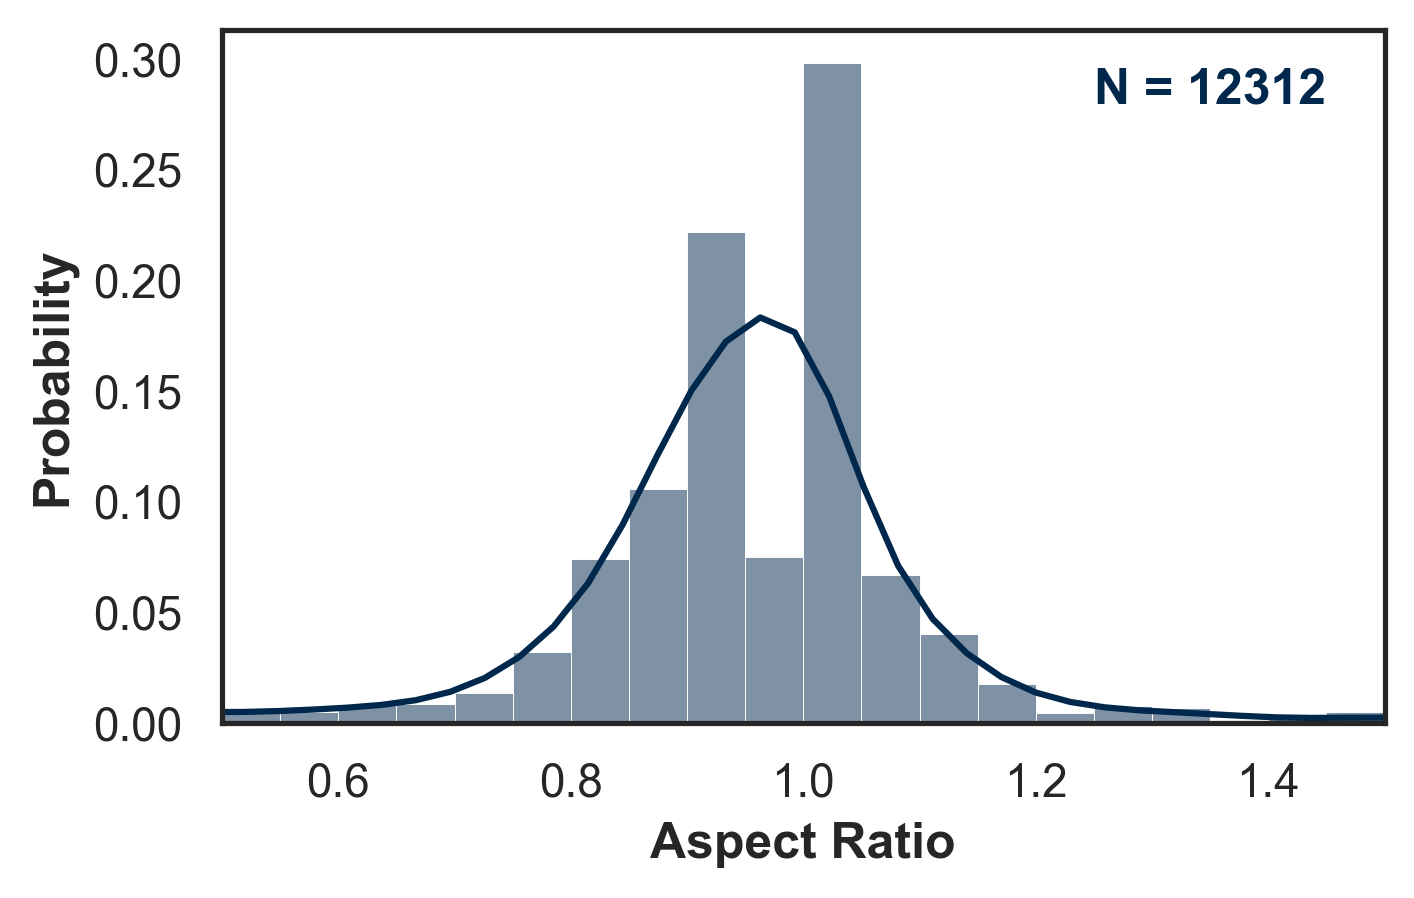

In [4]:
## plot aspect ratio
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=df_all,
    x="aspect_ratio",
    bins=20,
    stat="probability",
    color=color,
    kde=True,
    binrange=(0.5, 1.5),
    lw=3,
)
plt.text(
    1.25,
    0.28,
    "N = " + str(df_all.shape[0]),
    weight="bold",
    color=color,
)
plt.xlim(0.5, 1.5)
plt.xlabel("Aspect Ratio", weight="bold")
plt.ylabel("Probability", weight="bold")
fname_save = "Condensate_aspect_ratio_histo.png"
plt.savefig(fname_save, format="png", bbox_inches="tight")
plt.show()

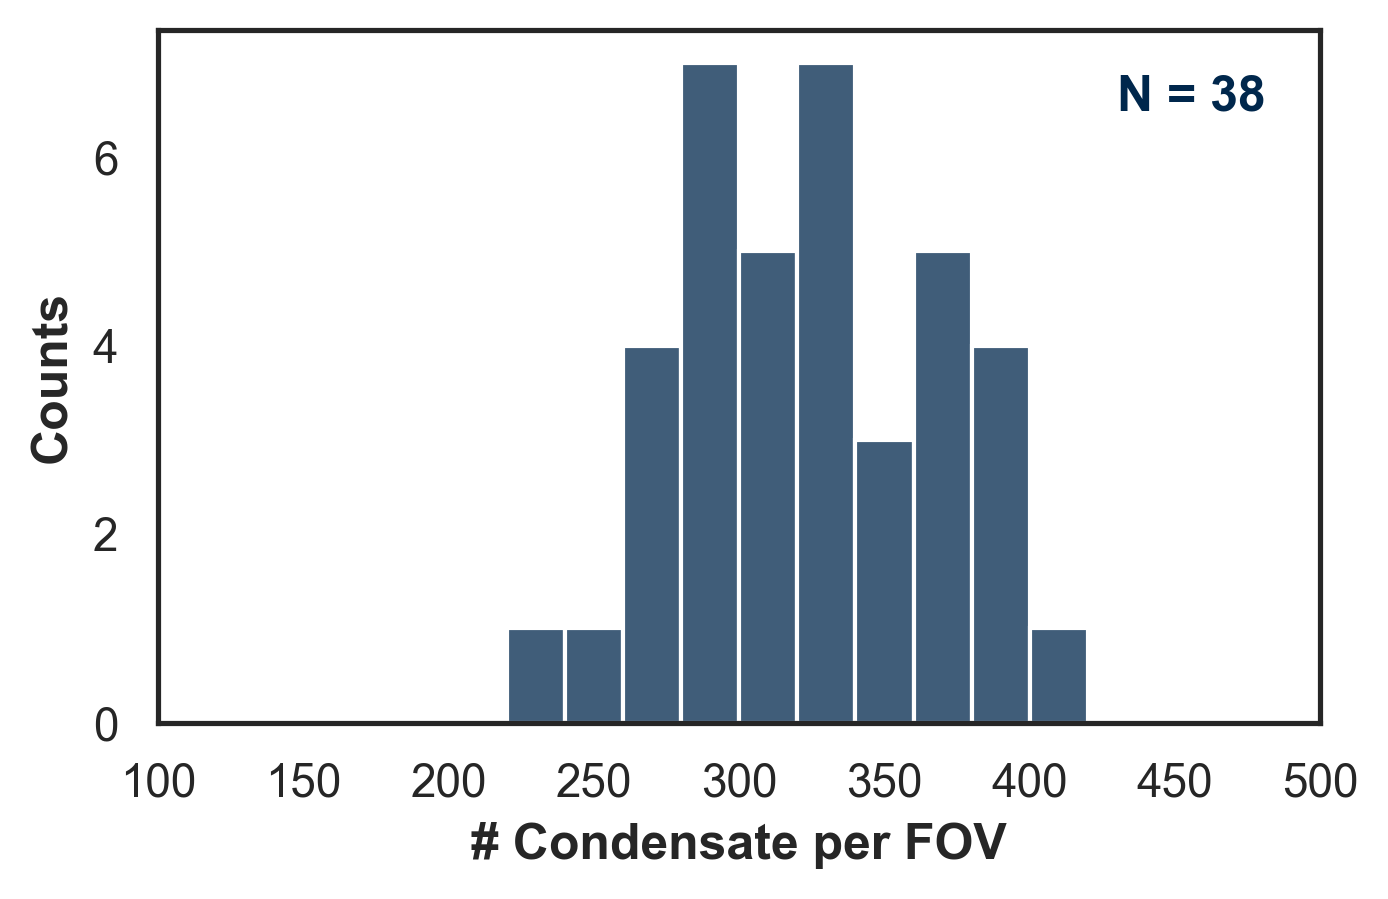

In [5]:
## plot N per FOV
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=df_perFOV_stats,
    x="N_per_FOV",
    bins=20,
    color=color,
    binrange=(100, 500),
)
plt.text(
    430,
    6.5,
    "N = " + str(df_perFOV_stats.shape[0]),
    weight="bold",
    color=color,
)
plt.xlim(100, 500)
plt.xlabel("# Condensate per FOV", weight="bold")
plt.ylabel("Counts", weight="bold")
fname_save = "Condensate_NperFOV_histo.png"
plt.savefig(fname_save, format="png", bbox_inches="tight")
plt.show()

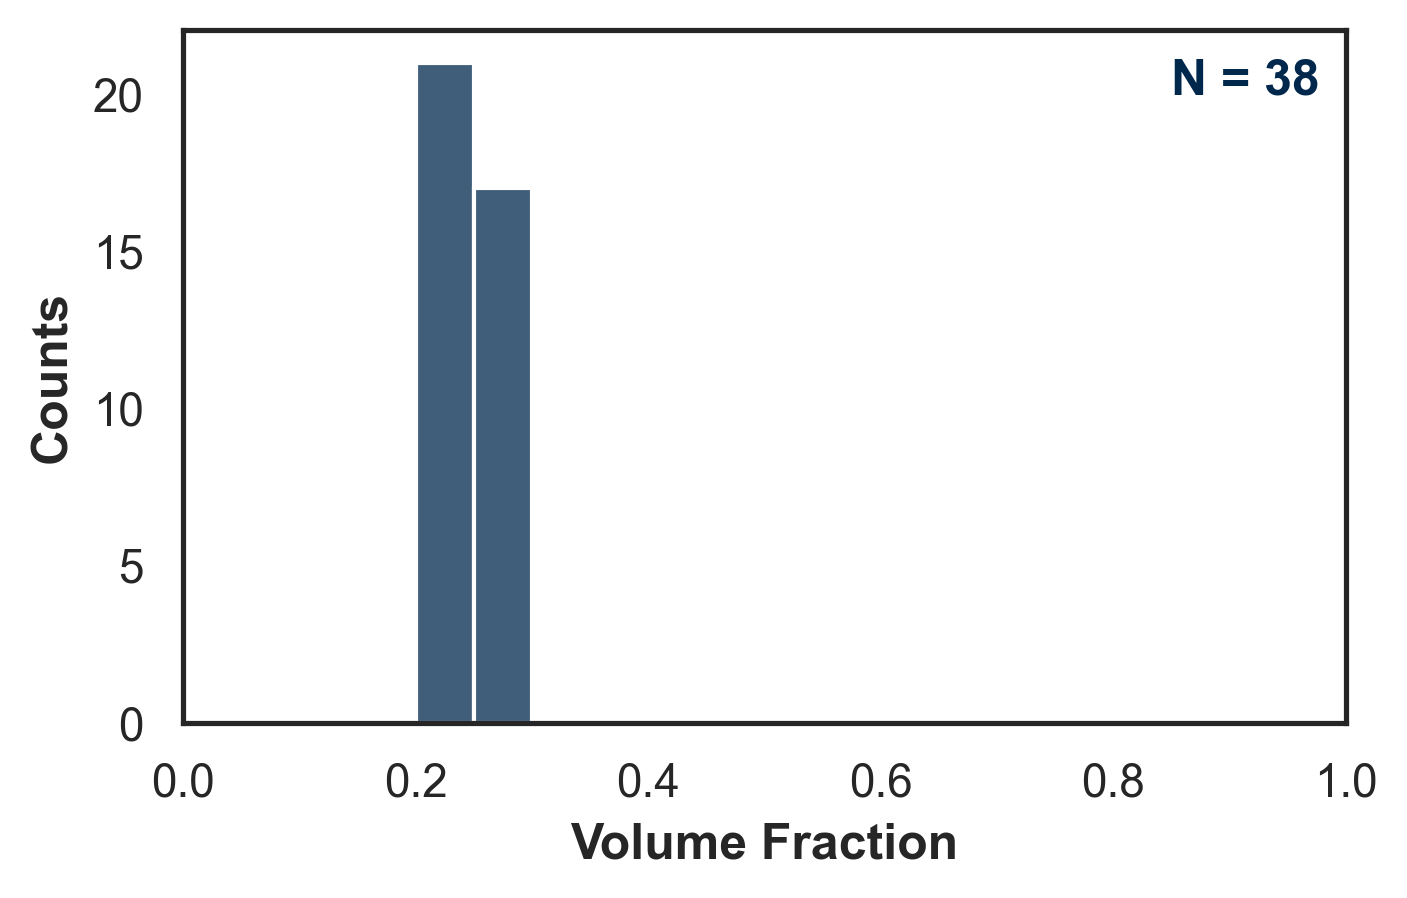

In [6]:
## plot Area Frac
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=df_perFOV_stats,
    x="area_fraction",
    bins=20,
    color=color,
    binrange=(0, 1),
)
plt.text(
    0.85,
    20,
    "N = " + str(df_perFOV_stats.shape[0]),
    weight="bold",
    color=color,
)
plt.xlim(0, 1)
plt.xlabel("Volume Fraction", weight="bold")
plt.ylabel("Counts", weight="bold")
fname_save = "Condensate_VolFrac_histo.png"
plt.savefig(fname_save, format="png", bbox_inches="tight")
plt.show()